# **Importing Libraries and Loading the Dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Loading the dataset into pandas dataframe
url = "https://raw.githubusercontent.com/amalayil23/IoT_Proj2/refs/heads/main/SaYoPillow.csv"

data = pd.read_csv(url)



data.rename(columns={'sr.1': 'sh'}, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sh      630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


# **Features**

    sr: snoring rate, snoring rate, refer to the frequency and intensity of snoring events during a person's sleep
    rr: respiration rate , times per minute
    t: body temperature
    lm: limb movement
    bo: blood oxygen
    rem: eye movement
    sh: sleeping hours
    hr: heart rate
    sl: stress level, (0: low/normal, 1: medium low, 2: medium, 3: medium high, 4: high)

# **EDA**

In [ ]:
#Inspecting amount of null value.

null_data = pd.DataFrame()

feature= []
nullcount =[]
nullPc = []
for i in data.columns:
  feature.append(i)
  nullcount.append(data[i].isnull().sum())
  nullPc.append((((data[i].isnull().sum())/3276)*100).round(2))


null_data["Feature"] = feature
null_data["Null_Count"] = nullcount
null_data["Null %"] = nullPc

null_data.head(10)

,Feature,Null_Count,Null %
0,sr,0,0.0
1,rr,0,0.0
2,t,0,0.0
3,lm,0,0.0
4,bo,0,0.0
5,rem,0,0.0
6,sh,0,0.0
7,hr,0,0.0
8,sl,0,0.0


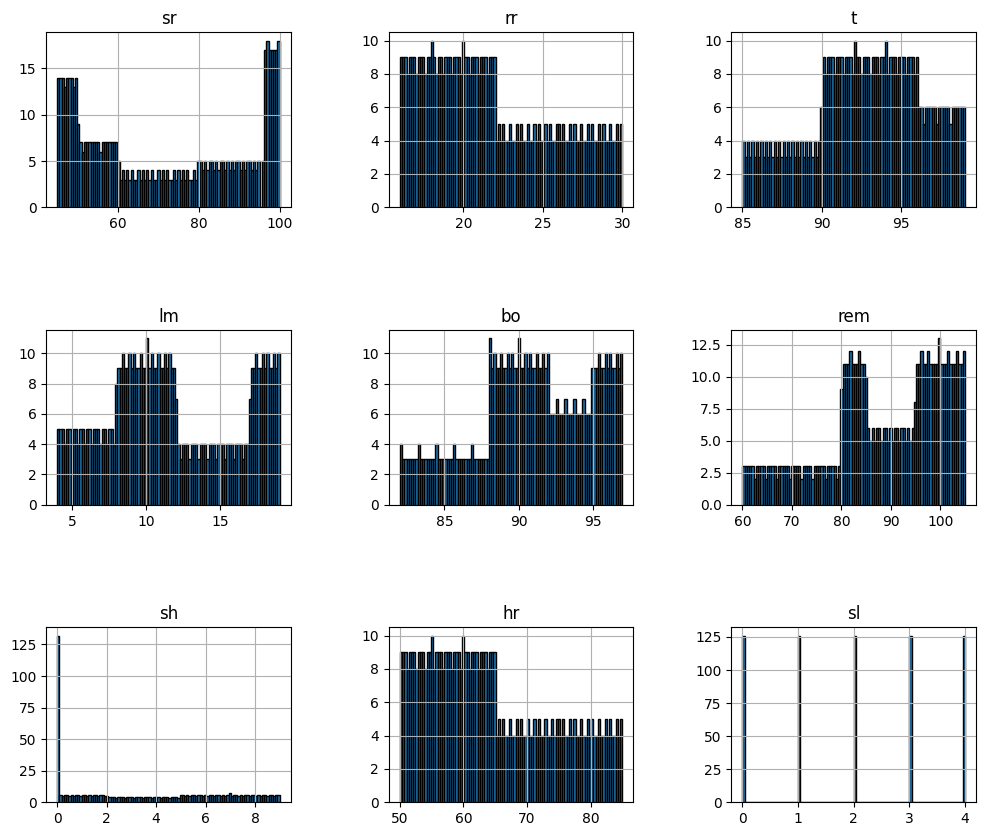

In [ ]:
#Plotting the distribution of features

#print(data.describe())
data.hist(figsize=(12, 10), bins=100, edgecolor="black")
#plt.title('Before EDA')
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

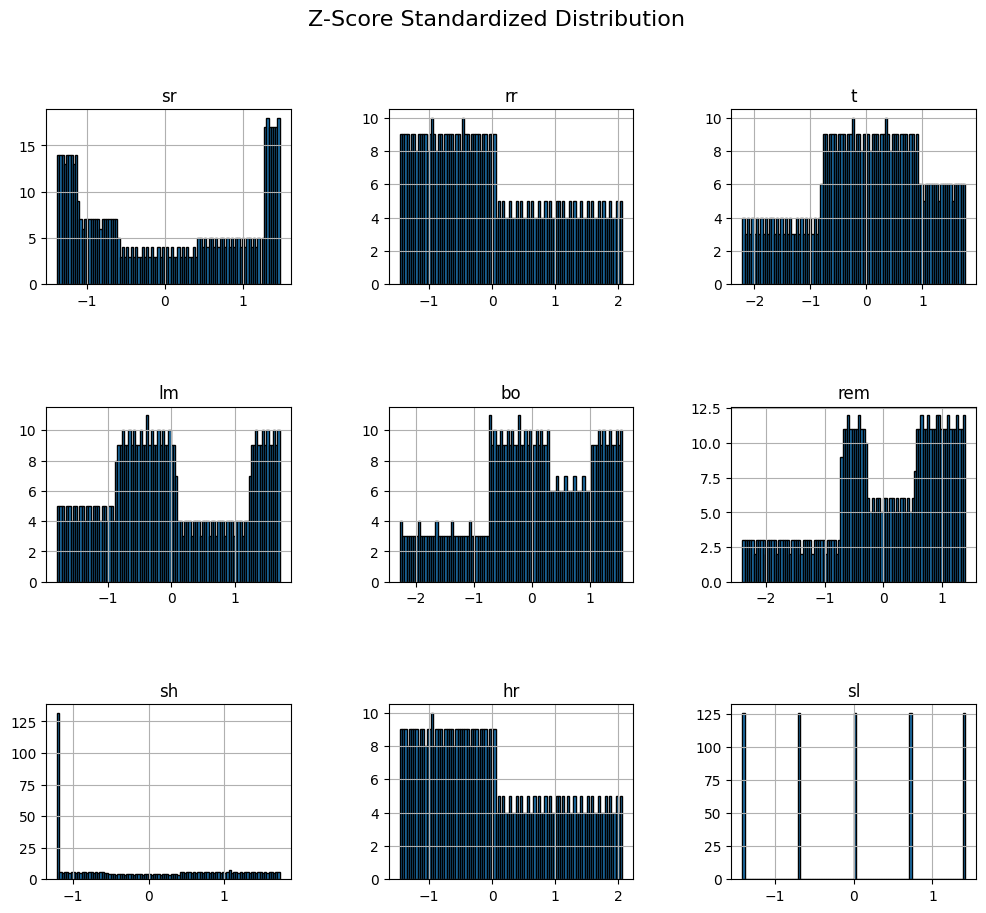

In [ ]:
# CALCULATING Z-SCORE STANDARDIZED DATA

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

standardized_data = data.apply(zscore)

# PLOTTING THE DISTRIBUTION OF STANDARDIZED FEATURES
standardized_data.hist(figsize=(12, 10), bins=100, edgecolor="black")
plt.suptitle('Z-Score Standardized Distribution', fontsize=16)
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

#Conclusions
#Body temperature has more of an normal bell curve distribution
#Which makes it more predictable.

In [ ]:
# Around 25% of samples in the dataset has sleep hours less than 0.5
'''
PURPOSE:
IDENTIFY OUTLIERS: ROWS WITH LESS THAN 0.5 HOURS OF SLEEP ARE DEEMED UNREALISTIC OR ERRONEOUS.
CLEAN THE DATA: REPLACING OUTLIERS WITH THE COLUMN MEAN IS A COMMON DATA IMPUTATION METHOD.
ENSURE DATA CONSISTENCY: SUCH STEPS MAKE THE DATA MORE RELIABLE FOR ANALYSIS AND MODELING.
'''

print(data[data['sh']<0.5]['sh'].count()/data['sh'].count()*100)

# We will replace it with the mean value of the column.
data.loc[data['sh']<0.5, 'sh'] = data['sh'].mean()
#
print(data[data['sh']<0.5]['sh'].count()/data['sh'].count())




25.07936507936508
0.0


sl
0    126
1    126
2    126
3    126
4    126
Name: count, dtype: int64


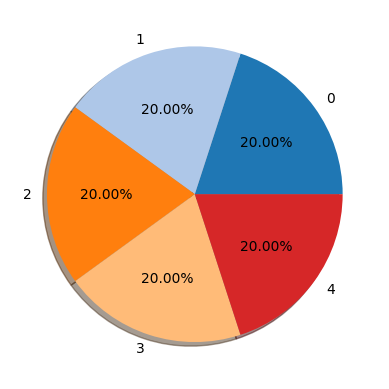

In [ ]:
#Checking database balance in terms of target variable
'''
PURPOSE OF THE VISUALIZATION:
CHECK CLASS BALANCE:
IDENTIFY IF THE TARGET VARIABLE ('sl') HAS A BALANCED OR IMBALANCED DISTRIBUTION (E.G., ONE CLASS DOMINATING).
DATA ANALYSIS:
UNDERSTAND THE PROPORTIONS OF EACH CATEGORY IN THE TARGET VARIABLE.
HELPFUL FOR MODELING:
IMBALANCED CLASSES MAY REQUIRE SPECIAL TECHNIQUES (E.G., OVERSAMPLING, UNDERSAMPLING, OR WEIGHTED LOSS FUNCTIONS).

'''
# Define the colors for the pie chart
#colors = ['lightblue', 'mediumblue', 'darkblue', 'lightgreen', 'darkgreen']

colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#d62728']

sorted_counts = data['sl'].value_counts().sort_index()
print(sorted_counts)
plt.pie(x=sorted_counts,
        labels=sorted_counts.index,
        autopct="%1.2f%%", shadow=True, colors = colors)
plt.show()




# **Feature Engineering**

In [ ]:
import numpy as np

'''
https://ouraring.com/blog/breathing-rate-while-sleeping/

THE NEW FEATURES BEING ENGINEERED IN THIS CODE ARE:
1.(Ideal Respiratory Rate)
2.(Ideal Body Temperature)
3.(Ideal Blood Oxygen Level)
4.(Ideal Heart Rate)

THESE NEW FEATURES HELP IDENTIFY WHETHER EACH SAMPLE HAS MEASUREMENTS THAT FALL WITHIN THE EXPECTED "IDEAL" RANGES FOR RESPIRATORY RATE, BODY TEMPERATURE, BLOOD OXYGEN, AND HEART RATE.
THESE BINARY FEATURES (1/0) CAN BE USED LATER IN MODELING TO EASILY IDENTIFY IDEAL CONDITIONS OR TRACK WHETHER A PERSON IS WITHIN A HEALTHY STATE.
'''

Thresholds = {'rr':[12,20], 't':[95,98], 'bo':[95,100], 'hr':[50,75]}


data['ideal_rr'] = np.where((data['rr']>= 12) & (data['rr']<=20), 1,0) # Ideal Respiratory rate column
data['ideal_t'] = np.where((data['t']>= 94) & (data['t']<=98), 1,0) #Ideal Body temperature
data['ideal_bo'] = np.where((data['bo']>= 94) & (data['bo']<=98), 1,0) # Ideal Blood Oxygen Level
data['ideal_hr'] = np.where((data['hr']>= 50) & (data['hr']<=75), 1,0) #Ideal Heart rate
data.head()

,sr,rr,t,lm,bo,rem,sh,hr,sl,ideal_rr,ideal_t,ideal_bo,ideal_hr
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3,0,0,0,1
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3,0,0,0,1
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1,1,1,1,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3,0,0,0,1
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0,1,1,1,1


# **Correlation Matrix**

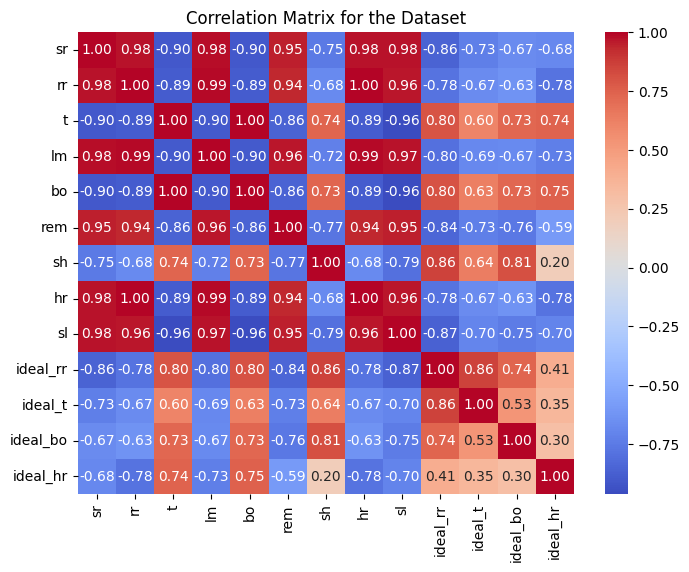

In [ ]:
'''
PURPOSE:
TO IDENTIFY STRONG, WEAK, OR NO CORRELATIONS BETWEEN THE VARIABLES IN THE DATASET. THIS CAN HELP WITH FEATURE SELECTION AND UNDERSTANDING RELATIONSHIPS BETWEEN VARIABLES.

'''


import seaborn as sns

# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for the Dataset')
plt.show()

# **Random Forest**


Confusion Matrix:
[[27  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 34  1  0]
 [ 0  0  0 23  0]
 [ 0  0  0  0 18]]

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|      0       |    1.0    |  1.0   |   1.0    |  27.0   |
|      1       |    1.0    |  1.0   |   1.0    |  23.0   |
|      2       |    1.0    |  0.97  |   0.99   |  35.0   |
|      3       |   0.96    |  1.0   |   0.98   |  23.0   |
|      4       |    1.0    |  1.0   |   1.0    |  18.0   |
|   accuracy   |   0.99    |  0.99  |   0.99   |  0.99   |
|  macro avg   |   0.99    |  0.99  |   0.99   |  126.0  |
| weighted avg |   0.99    |  0.99  |   0.99   |  126.0  |
+--------------+-----------+--------+----------+---------+ 




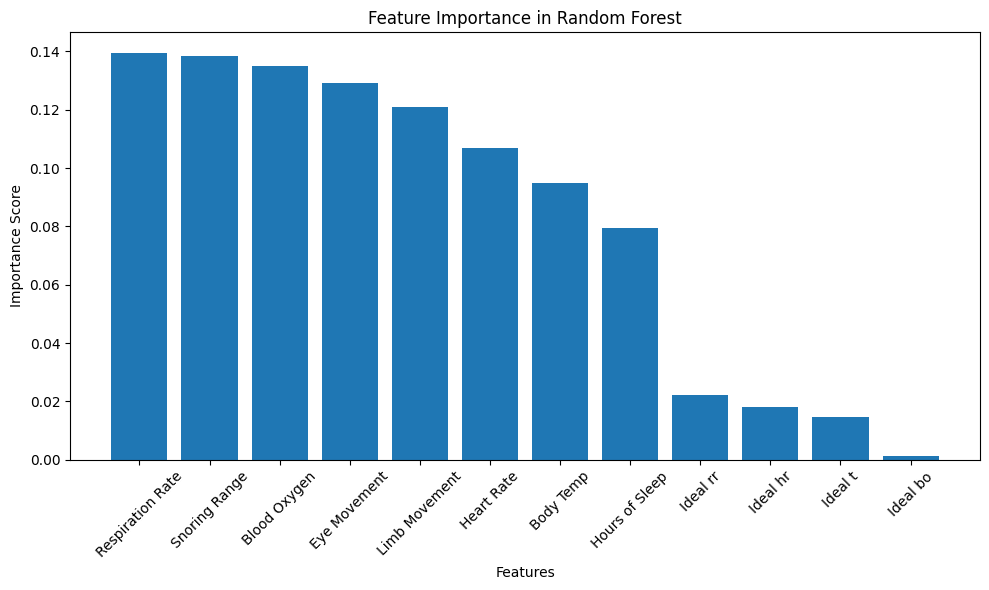

In [ ]:
# Decision trees - Random Forests #

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

#Dropping the Target variable and splitting the dataset for training and testing

X = data.drop('sl', axis=1)  # 'sl' is the target variable in this case
y = data['sl']  # 'sl' is the target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

#create and train Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=35)
model_rf.fit(X_train, y_train)



# Make predictions on the test set
y_pred = model_rf.predict(X_test)



# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
#print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

report =  classification_report(y_test, y_pred,output_dict=True)
report_df = pd.DataFrame(report).transpose().round(2)
# Classification Report
print("\nClassification Report:")
print(tabulate(report_df, headers='keys', tablefmt='pretty'),"\n\n")



# Feature in the dataset
feature_names = ['Snoring Range', 'Respiration Rate', 'Body Temp', 'Limb Movement',
                 'Blood Oxygen', 'Eye Movement', 'Hours of Sleep', 'Heart Rate',"Ideal rr","Ideal t","Ideal bo","Ideal hr"]

# Getting the feature importance from the model
importances_rf = model_rf.feature_importances_

# Sorting the feature importances
sorted_feat = np.argsort(importances_rf)[::-1]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest")
plt.bar(range(len(importances_rf)), importances_rf[sorted_feat], align="center")
plt.xticks(range(len(importances_rf)), [feature_names[i] for i in sorted_feat], rotation=45)
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


# **SVM**

Accuracy: 1.00
Confusion Matrix:
[[27  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 35  0  0]
 [ 0  0  0 23  0]
 [ 0  0  0  0 18]]

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|      0       |    1.0    |  1.0   |   1.0    |  27.0   |
|      1       |    1.0    |  1.0   |   1.0    |  23.0   |
|      2       |    1.0    |  1.0   |   1.0    |  35.0   |
|      3       |    1.0    |  1.0   |   1.0    |  23.0   |
|      4       |    1.0    |  1.0   |   1.0    |  18.0   |
|   accuracy   |    1.0    |  1.0   |   1.0    |   1.0   |
|  macro avg   |    1.0    |  1.0   |   1.0    |  126.0  |
| weighted avg |    1.0    |  1.0   |   1.0    |  126.0  |
+--------------+-----------+--------+----------+---------+ 




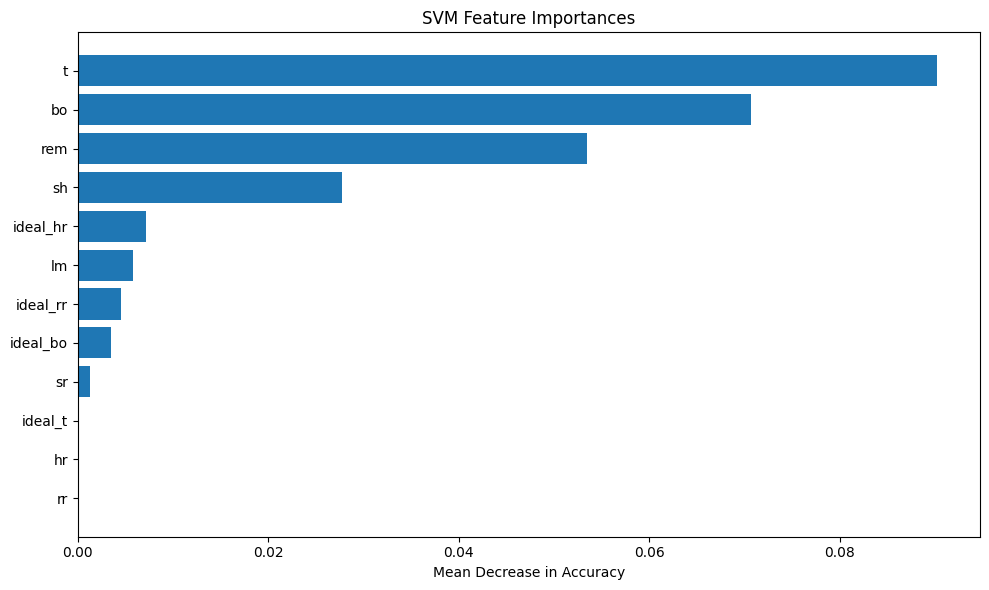

In [ ]:
#
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

#Dropping the Target variable and splitting the dataset for training and testing

X = data.drop('sl', axis=1)  # 'sl' is the target variable in this case
y = data['sl']  # 'sl' is the target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)


#  Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the SVM model
model_svm = SVC(kernel='rbf', random_state=42)

#Training the model
model_svm.fit(X_train, y_train)

#Making predictions
y_pred = model_svm.predict(X_test)

#Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

report =  classification_report(y_test, y_pred,output_dict=True)
report_df = pd.DataFrame(report).transpose().round(2)
# Classification Report
print("\nClassification Report:")
print(tabulate(report_df, headers='keys', tablefmt='pretty'),"\n\n")

#===========================================================
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt


#https://www.geeksforgeeks.org/determining-feature-importance-in-svm-classifiers-with-scikit-learn/

# CALCULATE PERMUTATION IMPORTANCE
importances_svm = permutation_importance(model_svm, X_test, y_test, n_repeats=30, random_state=42).importances_mean

# SORT IMPORTANCE VALUES
sorted_idx = importances_svm.argsort()

# PLOT PERMUTATION IMPORTANCE
plt.figure(figsize=(10, 6))
plt.title("SVM Feature Importances")
plt.barh(range(len(sorted_idx)), importances_svm[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel("Mean Decrease in Accuracy")
plt.tight_layout()
plt.show()



# **K-Nearest Neighbors**

Accuracy: 1.00
Confusion Matrix:
[[27  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 35  0  0]
 [ 0  0  0 23  0]
 [ 0  0  0  0 18]]

Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|      0       |    1.0    |  1.0   |   1.0    |  27.0   |
|      1       |    1.0    |  1.0   |   1.0    |  23.0   |
|      2       |    1.0    |  1.0   |   1.0    |  35.0   |
|      3       |    1.0    |  1.0   |   1.0    |  23.0   |
|      4       |    1.0    |  1.0   |   1.0    |  18.0   |
|   accuracy   |    1.0    |  1.0   |   1.0    |   1.0   |
|  macro avg   |    1.0    |  1.0   |   1.0    |  126.0  |
| weighted avg |    1.0    |  1.0   |   1.0    |  126.0  |
+--------------+-----------+--------+----------+---------+ 




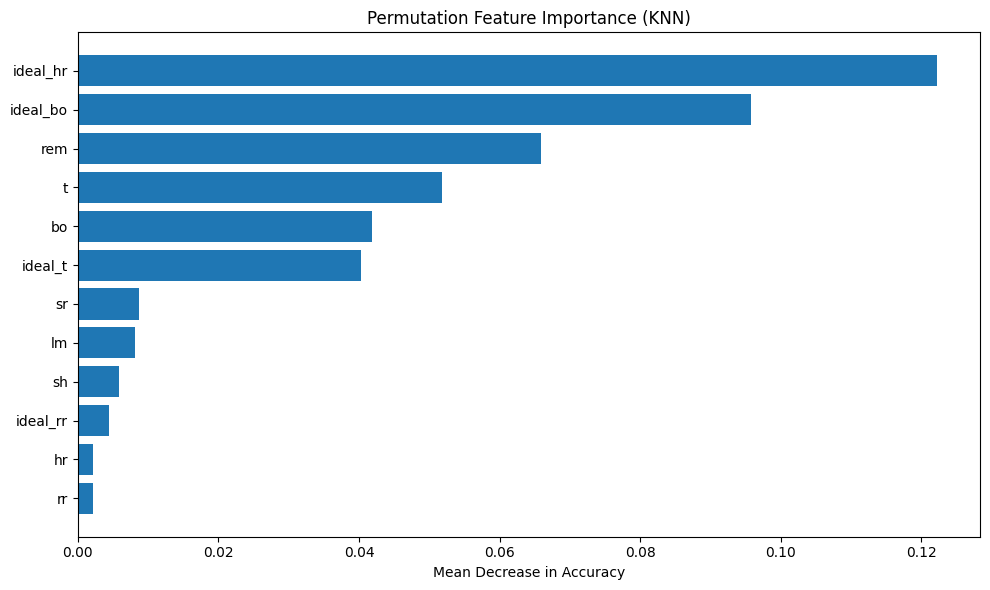

In [ ]:

# Importing neccesary libararies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

#Dropping the Target variable and splitting the dataset for training and testing

X = data.drop('sl', axis=1)  # 'sl' is the target variable in this case
y = data['sl']  # 'sl' is the target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)


# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating the model
model_knn = KNeighborsClassifier(n_neighbors=5)  # YOU CAN TUNE 'n_neighbors' BASED ON YOUR DATA


# Training the model
model_knn.fit(X_train_scaled, y_train)




# Making prediction with test data
y_pred = model_knn.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#confusio  matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

report =  classification_report(y_test, y_pred,output_dict=True)
report_df = pd.DataFrame(report).transpose().round(2)
# Classification Report
print("\nClassification Report:")
print(tabulate(report_df, headers='keys', tablefmt='pretty'),"\n\n")



#https://scikit-learn.org/stable/modules/permutation_importance.html


importances_knn = permutation_importance(model_knn, X_test_scaled, y_test, n_repeats=30, random_state=42).importances_mean

# Sorting
sorted_idx = importances_knn.argsort()


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importances_knn[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel("Mean Decrease in Accuracy")
plt.title("Permutation Feature Importance (KNN)")
plt.tight_layout()
plt.show()



# **Analyzing the Results**

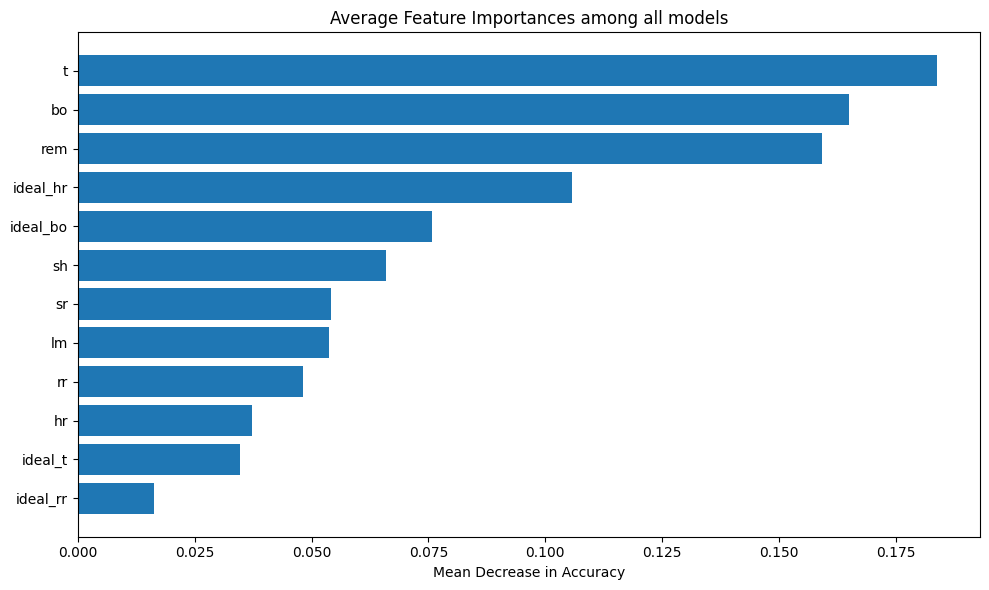

In [ ]:
#We are finding the most important features in predicting stress levels from all 3 models.

importances_knn /= np.sum(importances_knn)
importances_svm /= np.sum(importances_svm)

average =  ( importances_rf + importances_knn + importances_svm ) / 3


# Sort Importance
sorted_idx = average.argsort()

# Plotting the values
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), average[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel("Mean Decrease in Accuracy")
plt.title("Average Feature Importances among all models")
plt.tight_layout()
plt.show()
